In [3]:
import pandas as pd
import numbers as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import tree, model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
import joblib

In [4]:
df_raw = pd.read_csv('/Users/sameerkallurkar/PycharmProjects/ML_exec/mini project 3 (decision tree)/drug200.csv')
df_raw.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [5]:
df_raw.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
df_raw.duplicated().sum()

0

In [7]:
df_preprocess = df_raw
df_preprocess.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [8]:
label = LabelEncoder()
df_preprocess['gender_encode'] = label.fit_transform(df_preprocess['Sex'])
df_preprocess['BP_encode'] = label.fit_transform(df_preprocess['BP'])
df_preprocess['Chol_encode'] = label.fit_transform(df_preprocess['Cholesterol'])
df_preprocess.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,gender_encode,BP_encode,Chol_encode
0,23,F,HIGH,HIGH,25.355,drugY,0,0,0
1,47,M,LOW,HIGH,13.093,drugC,1,1,0
2,47,M,LOW,HIGH,10.114,drugC,1,1,0
3,28,F,NORMAL,HIGH,7.798,drugX,0,2,0
4,61,F,LOW,HIGH,18.043,drugY,0,1,0


In [9]:
df_final = df_preprocess[['Age', 'Na_to_K', 'gender_encode', 'BP_encode', 'Chol_encode']]
df_final.head()

,Age,Na_to_K,gender_encode,BP_encode,Chol_encode
0,23,25.355,0,0,0
1,47,13.093,1,1,0
2,47,10.114,1,1,0
3,28,7.798,0,2,0
4,61,18.043,0,1,0


In [10]:
target = df_preprocess.Drug
target.head()

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [11]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(df_final , target, test_size=0.2)

In [21]:
x_test.head()

,Age,Na_to_K,gender_encode,BP_encode,Chol_encode
62,67,20.693,1,1,1
145,61,9.443,1,2,0
112,35,9.170,1,1,1
132,49,13.598,1,1,1
149,22,8.151,1,1,0


In [12]:
model = tree.DecisionTreeClassifier()

In [13]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [22]:
y_predicted = model.predict(x_test)
y_predicted

array(['drugY', 'drugX', 'drugX', 'drugX', 'drugC', 'drugB', 'drugB',
       'drugB', 'drugY', 'drugY', 'drugY', 'drugA', 'drugC', 'drugY',
       'drugA', 'drugA', 'drugX', 'drugA', 'drugA', 'drugX', 'drugY',
       'drugX', 'drugX', 'drugA', 'drugX', 'drugY', 'drugY', 'drugC',
       'drugY', 'drugX', 'drugA', 'drugC', 'drugX', 'drugX', 'drugC',
       'drugC', 'drugY', 'drugY', 'drugB', 'drugX'], dtype=object)

In [15]:
model.score(x_test, y_test)

1.0

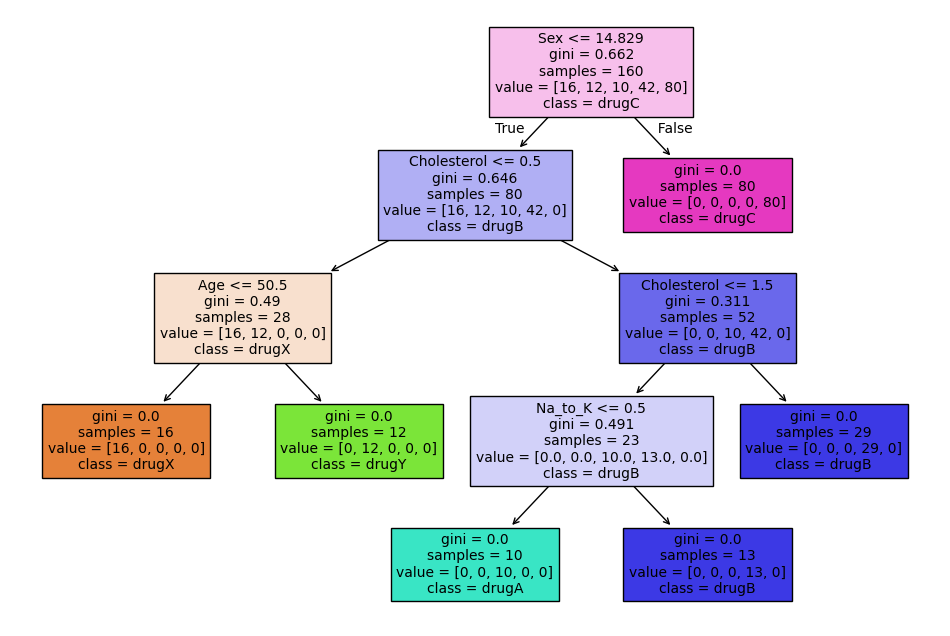

In [23]:
plt.figure(figsize=(12,8))
tree.plot_tree(model, feature_names=['Age','Sex','BP','Cholesterol','Na_to_K'],class_names=['drugX','drugY','drugA', 'drugB','drugC'],filled=True, fontsize=10)
plt.show()

In [17]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        12
       drugY       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [18]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[ 7,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  0],
       [ 0,  0,  6,  0,  0],
       [ 0,  0,  0, 12,  0],
       [ 0,  0,  0,  0, 11]])

Text(50.722222222222214, 0.5, 'target')

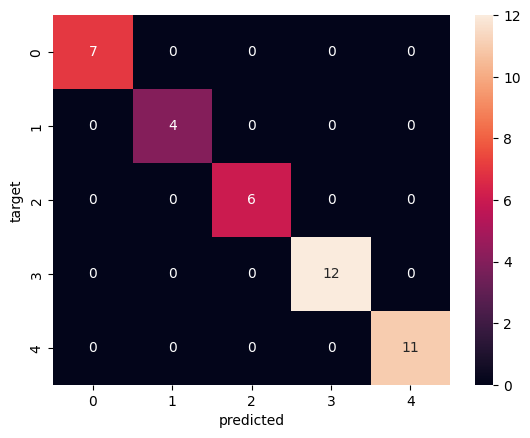

In [19]:
plt.figure()
sn.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('target')

In [20]:
# joblib.dump(model, 'drug_predict.pkl')

['drug_predict.pkl']